In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

%matplotlib inline

# Description of Variables

 **Variable name** | **Description**                                                                                                                                                                            
:-------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 LONG | longitude (geographic coordinate)
 LAT | latitude (geographic coordinate)
 ACCESS | travel time to the nearest city with a population of more than 50,000
 PET | represents humidity by potential evapotranspiration, which measures the potential amount of evaporation.
 POP | population size provided by WorldPop
 URBAN | urbanity Global Urban Footprint data
 WACCESS | travel time from a location in China to Wuhan
 IR | COVID-19 incidence rate per 100,000 population (Jan-Mar 2020)

# Load data

In [2]:
# save all different datas in the "data" dictionary
data = {}
data["all"] = pd.read_csv("../../data/csvs/data.csv", index_col="index")
data["train"] = pd.read_csv("../../data/csvs/split/train.csv", index_col="index")
data["validation"] = pd.read_csv("../../data/csvs/split/validation.csv", index_col="index")
data["test"] = pd.read_csv("../../data/csvs/split/test.csv", index_col="index")

In [3]:
data["all"].describe()

,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,107.498655,33.592855,-0.481589,0.118251,0.672332,0.788644,-0.429321,2.076445
std,12.152613,6.278269,1.409672,0.781895,1.576832,1.164337,1.106955,6.757308
min,78.270833,18.291870,-3.487341,-2.363020,-1.974678,-0.482502,-3.676348,0.000000
25%,101.395833,29.521206,-1.493258,-0.399133,-0.216299,-0.482502,-1.127073,0.066021
50%,109.904050,34.279290,-0.734903,0.173306,0.907536,0.798634,-0.720350,0.398705
75%,116.805175,37.645833,0.301102,0.575787,1.758941,1.581750,0.308398,1.300860
max,132.546400,49.717850,3.444752,2.789949,4.630500,4.335167,2.691532,131.926332


In [4]:
data["train"].describe()

,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,107.333542,33.334829,-0.458511,0.101652,0.650811,0.746911,-0.404931,2.259466
std,12.091811,6.383834,1.392855,0.770563,1.549964,1.137909,1.138657,7.892628
min,80.770833,18.291870,-3.381524,-2.093094,-1.974678,-0.482502,-3.676348,0.000000
25%,100.890008,29.383835,-1.447162,-0.401803,-0.203643,-0.482502,-1.088198,0.072634
50%,109.843950,33.895833,-0.723060,0.180719,0.863445,0.746613,-0.721923,0.397232
75%,116.733800,37.211770,0.281303,0.535925,1.681246,1.523399,0.339266,1.308119
max,132.289900,49.532410,3.166352,2.525440,4.630500,4.335167,2.691532,131.926332


In [5]:
data["validation"].describe()

,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,106.823773,34.330778,-0.455611,0.163046,0.646382,0.797787,-0.420652,1.630725
std,12.278211,5.897800,1.482040,0.814312,1.685130,1.237451,1.020641,4.080371
min,78.270833,19.209590,-3.384312,-2.363020,-1.974678,-0.482502,-2.770429,0.000000
25%,97.645833,30.333725,-1.579963,-0.370660,-1.255968,-0.482502,-1.109135,0.000000
50%,109.088900,35.122740,-0.677350,0.215293,0.861038,0.791722,-0.622328,0.317974
75%,116.503600,37.905630,0.364501,0.661350,1.928181,1.751216,0.377328,1.256455
max,132.546400,47.708940,3.045997,2.633544,4.630500,3.792246,2.558269,31.741818


In [6]:
data["test"].describe()

,LONG,LAT,ACCESS,PET,POP,URBAN,WACCESS,IR
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,108.665838,33.624262,-0.576376,0.122948,0.762446,0.903931,-0.510710,1.976469
std,12.204232,6.307577,1.390045,0.785473,1.550839,1.166314,1.096568,5.013168
min,82.645833,18.594640,-3.487341,-1.500463,-1.974678,-0.482502,-2.755293,0.000000
25%,102.877317,29.557917,-1.603309,-0.426510,0.213310,-0.482502,-1.226813,0.121099
50%,111.908300,34.289740,-0.840667,0.137118,1.039619,0.972623,-0.780356,0.432079
75%,117.817200,37.573972,0.207781,0.553703,1.765649,1.570941,0.098358,1.323638
max,129.457900,49.717850,3.444752,2.789949,3.991484,3.653661,2.670783,38.558924


# Plot and explore each variable

<AxesSubplot:ylabel='Frequency'>

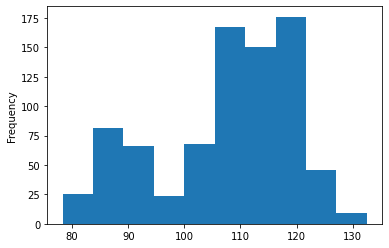

In [7]:
data["all"]["LONG"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

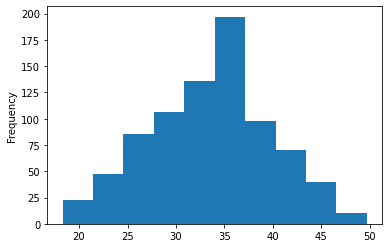

In [8]:
data["all"]["LAT"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

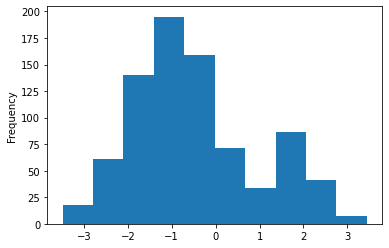

In [9]:
data["all"]["ACCESS"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

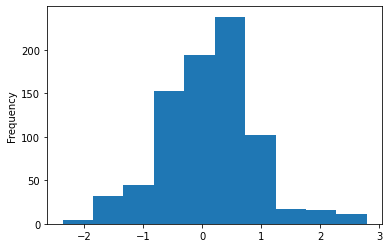

In [10]:
data["all"]["PET"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

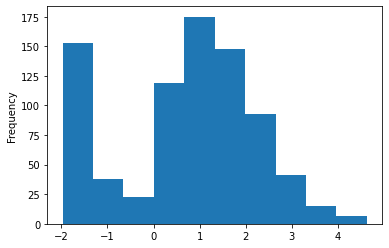

In [11]:
data["all"]["POP"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

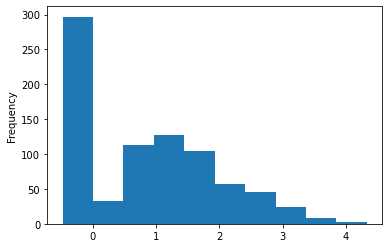

In [12]:
data["all"]["URBAN"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

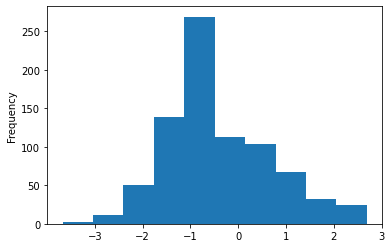

In [13]:
data["all"]["WACCESS"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

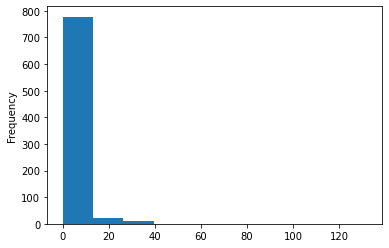

In [14]:
data["all"]["IR"].plot.hist()

# Standardise and normalise data

In [15]:
data_scaled = data["all"].copy()

<AxesSubplot:ylabel='Frequency'>

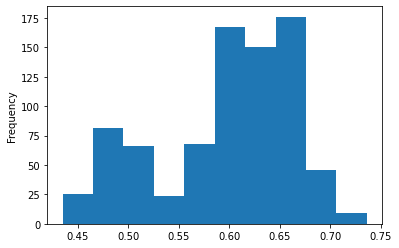

In [16]:
data_scaled["longitude"] = data["all"]["LONG"] / 180
data_scaled["longitude"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

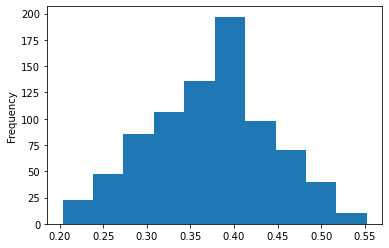

In [17]:
data_scaled["latitude"] = data["all"]["LAT"] / 90
data_scaled["latitude"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

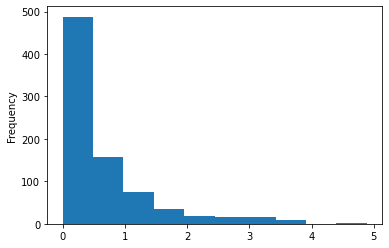

In [18]:
data_scaled["adj_cases"] = np.log(data["all"]["IR"] + 1)
data_scaled["adj_cases"].plot.hist()